In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-dataset/Covid Data.csv


In [2]:
df = pd.read_csv("/kaggle/input/covid19-dataset/Covid Data.csv")
print("Shape of Dataset:", df.shape)
df.head()

Shape of Dataset: (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
df.tail(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

after seeing covid19 data is looks quite confusing, because they have mentioned few things with 1="yes" and 2 = "no" but , that's going to undefined way to deal with this data, so i'm working on this project by myself and trying to apply my ideas on it
so first of all we need to 
* find out non usable rows and need to declare gender column as string (M or f), so we could differentiate high changes of getting my gender and also cure treatment period , if womans is pregnant 
* patient type needs to change as "home " and hospitalize" so we could classify data sets, if returned home don't need medical needs
* 


In [6]:
df = df.reindex(columns=['MEDICAL_UNIT','DATE_DIED','SEX','PATIENT_TYPE','AGE','USMER','INTUBED', 'PNEUMONIA','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO','CLASIFFICATION_FINAL','ICU'])
df.head(2)

,MEDICAL_UNIT,DATE_DIED,SEX,PATIENT_TYPE,AGE,USMER,INTUBED,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,1,03/05/2020,1,1,65,2,97,1,2,2,2,2,1,2,2,2,2,2,3,97
1,1,03/06/2020,2,1,72,2,97,1,2,2,2,2,1,2,2,1,1,2,5,97


In [7]:
df.loc[df['DATE_DIED'] =='9999-99-99', 'DIED'] = "Alive"
df.loc[df['DATE_DIED'] !='9999-99-99', 'DIED'] = "Died"
df = df.drop(['DATE_DIED'], axis=1)


In [8]:
#df.drop(['DATE_DIED'], axis=1)
#df1.head(2)
#df['OTHER_DISEASE'].value_counts()

In [9]:
# 97, 98 and 99 are missing values in given datasets
df[df == 97.0].count()

MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
AGE                        135
USMER                        0
INTUBED                 848544
PNEUMONIA                    0
DIABETES                     0
COPD                         0
ASTHMA                       0
INMSUPR                      0
HIPERTENSION                 0
OTHER_DISEASE                0
CARDIOVASCULAR               0
OBESITY                      0
RENAL_CHRONIC                0
TOBACCO                      0
CLASIFFICATION_FINAL         0
ICU                     848544
DIED                         0
dtype: int64

In [10]:
df[df == 98.0].count()


MEDICAL_UNIT               0
SEX                        0
PATIENT_TYPE               0
AGE                      124
USMER                      0
INTUBED                    0
PNEUMONIA                  0
DIABETES                3338
COPD                    3003
ASTHMA                  2979
INMSUPR                 3404
HIPERTENSION            3104
OTHER_DISEASE           5045
CARDIOVASCULAR          3076
OBESITY                 3032
RENAL_CHRONIC           3006
TOBACCO                 3220
CLASIFFICATION_FINAL       0
ICU                        0
DIED                       0
dtype: int64

In [11]:
df[df == 99.0].count()

MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
AGE                        86
USMER                       0
INTUBED                  7325
PNEUMONIA               16003
DIABETES                    0
COPD                        0
ASTHMA                      0
INMSUPR                     0
HIPERTENSION                0
OTHER_DISEASE               0
CARDIOVASCULAR              0
OBESITY                     0
RENAL_CHRONIC               0
TOBACCO                     0
CLASIFFICATION_FINAL        0
ICU                      7488
DIED                        0
dtype: int64

In [12]:
df.columns

Index(['MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'AGE', 'USMER', 'INTUBED',
       'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DIED'],
      dtype='object')

In [13]:
df = df[df[['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 
           'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']]
        .isin([1, 2]).all(axis=1)]

In [14]:
df[df == 99].count()

MEDICAL_UNIT               0
SEX                        0
PATIENT_TYPE               0
AGE                       80
USMER                      0
INTUBED                 2153
PNEUMONIA                  0
DIABETES                   0
COPD                       0
ASTHMA                     0
INMSUPR                    0
HIPERTENSION               0
OTHER_DISEASE              0
CARDIOVASCULAR             0
OBESITY                    0
RENAL_CHRONIC              0
TOBACCO                    0
CLASIFFICATION_FINAL       0
ICU                     2311
DIED                       0
dtype: int64

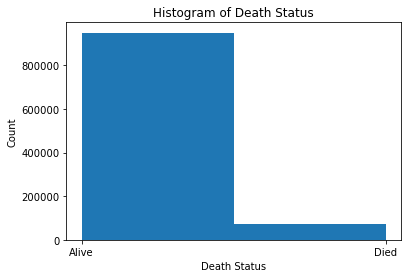

In [15]:
# Count the number of "Alive" and "Died" categories
alive_count = df[df['DIED'] == 'Alive'].shape[0]
died_count = df[df['DIED'] == 'Died'].shape[0]

# Plot the histogram
plt.hist(['Alive'] * alive_count + ['Died'] * died_count, bins=2)
plt.xlabel("Death Status")
plt.ylabel("Count")
plt.xticks(['Alive', 'Died'])
plt.title("Histogram of Death Status")
plt.show()

